# 06 Classification dengan KNN (K Nearest Neighbours)

- KNN adalah model machine learning yang dapat digunakan untuk melakukan prediksi berdasarkan kedekatan karakteristik dengan sejumlah tetangga terdekat.
- Prediksi yang dilakukan dapat diterapkan baik pada classification maupun regression tasks.

Referensi: [https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

## Sample Dataset

In [16]:
import pandas as pd

sensus = {
    'Umur': [15, 17, 18, 19, 55, 63, 32, 22, 24],
    'Jumlah Saudara': [2, 4, 3, 2, 6, 5, 4, 3, 1],
    'jk': [
        'wanita', 'pria', 'pria', 'wanita', 'pria', 'pria', 'wanita', 'wanita',
        'wanita'
    ]
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,Umur,Jumlah Saudara,jk
0,15,2,wanita
1,17,4,pria
2,18,3,pria
3,19,2,wanita
4,55,6,pria
5,63,5,pria
6,32,4,wanita
7,22,3,wanita
8,24,1,wanita


## Visualisasi Data

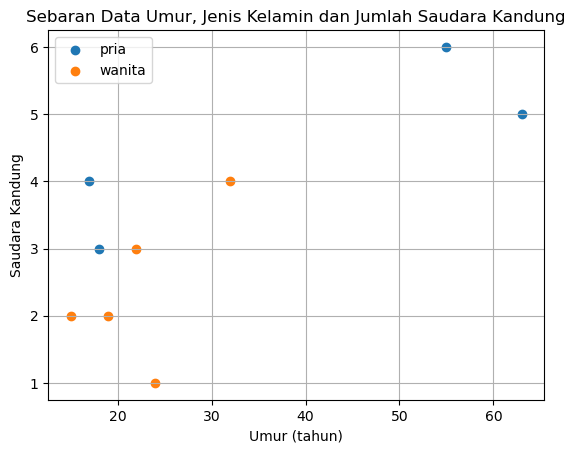

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['Umur'], d['Jumlah Saudara'], label=jk)

plt.legend(loc='upper left')
plt.title('Sebaran Data Umur, Jenis Kelamin dan Jumlah Saudara Kandung')
plt.xlabel('Umur (tahun)')
plt.ylabel('Saudara Kandung')
plt.grid(True)
plt.show()

## Classification dengan KNN

### Preprocessing Dataset

In [18]:
import numpy as np

X_train = np.array(sensus_df[['Umur', 'Jumlah Saudara']])
y_train = np.array(sensus_df['jk'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[15  2]
 [17  4]
 [18  3]
 [19  2]
 [55  6]
 [63  5]
 [32  4]
 [22  3]
 [24  1]]

y_train: ['wanita' 'pria' 'pria' 'wanita' 'pria' 'pria' 'wanita' 'wanita' 'wanita']


In [19]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]]


In [20]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [1 0 0 1 0 0 1 1 1]


### Training KNN Classification Model

In [21]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

### Prediksi Jenis Kelamin

In [22]:
umur_peserta = 15
saudara_kandung = 7
X_new = np.array([umur_peserta, saudara_kandung]).reshape(1, -1)
X_new

array([[15,  7]])

In [23]:
y_new = model.predict(X_new)
y_new

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0])

In [24]:
lb.inverse_transform(y_new)

array(['pria'], dtype='<U6')

### Visualisasi Nearest Neighbours

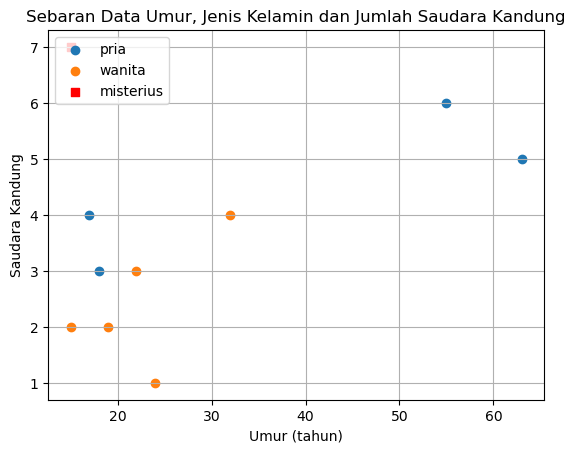

In [27]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['Umur'], d['Jumlah Saudara'], label=jk)

plt.scatter(umur_peserta,
            saudara_kandung,
            marker='s',
            color='red',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Umur, Jenis Kelamin dan Jumlah Saudara Kandung')
plt.xlabel('Umur (tahun)')
plt.ylabel('Saudara Kandung')
plt.grid(True)
plt.show()

### Kalkulasi Distance (Euclidean Distance)


$distance = \sqrt{ (t_1 - t_2)^2 + (b_1 - b_2)^2 }$

Referensi: [https://en.wikipedia.org/wiki/Euclidean_distance](https://en.wikipedia.org/wiki/Euclidean_distance)

In [29]:
misterius = np.array([umur_peserta, saudara_kandung])
misterius

array([15,  7])

In [30]:
X_train

array([[15,  2],
       [17,  4],
       [18,  3],
       [19,  2],
       [55,  6],
       [63,  5],
       [32,  4],
       [22,  3],
       [24,  1]], dtype=int64)

In [31]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[5.0,
 3.605551275463989,
 5.0,
 6.4031242374328485,
 40.01249804748511,
 48.041648597857254,
 17.26267650163207,
 8.06225774829855,
 10.816653826391969]

In [32]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,Umur,Jumlah Saudara,jk,jarak
1,17,4,pria,3.605551
0,15,2,wanita,5.000000
2,18,3,pria,5.000000
3,19,2,wanita,6.403124
7,22,3,wanita,8.062258
8,24,1,wanita,10.816654
6,32,4,wanita,17.262677
4,55,6,pria,40.012498
5,63,5,pria,48.041649


### Evaluasi KNN Classification Model

#### Testing Set

In [33]:
X_test = np.array([[16, 6], [30, 9], [40, 5], [12, 3]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test:
[[16  6]
 [30  9]
 [40  5]
 [12  3]]

y_test:
[0 0 1 1]


#### Prediksi terhadap testing set

In [34]:
y_pred = model.predict(X_test)
y_pred

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0, 1, 1, 0])

#### Accuracy

Accuracy is the proportion of test instances that were classified correctly.

$accuracy = \frac{tp\ +\ tn}{tp\ +\ tn\ +\ fp\ +\ fn}$

Referensi: [https://en.wikipedia.org/wiki/Precision_and_recall](https://en.wikipedia.org/wiki/Precision_and_recall)

In [35]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.5


#### Precission 

Precision is the proportion of test instances that were predicted to be positive that are truly positive. 

$precission = \frac{tp}{tp\ +\ fp}$

Referensi: [https://en.wikipedia.org/wiki/Precision_and_recall](https://en.wikipedia.org/wiki/Precision_and_recall)

In [36]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission: {prec}')

Precission: 0.5


#### Recall 

Recall is the proportion of truly positive test instances that were predicted to be positive.

$recall = \frac{tp}{tp\ + \ fn}$

Referensi: [https://en.wikipedia.org/wiki/Precision_and_recall](https://en.wikipedia.org/wiki/Precision_and_recall)

In [37]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')

Recall: 0.5


#### F1 Score 

The F1 score is the harmonic mean of precision and recall.

$F1 = 2 \times \frac{precission\ \times \ recall}{precission\ + \ recall}$

Referensi: [https://en.wikipedia.org/wiki/Precision_and_recall](https://en.wikipedia.org/wiki/Precision_and_recall)

In [38]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

F1-score: 0.5


#### Classification Report

In [39]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.50      0.50      0.50         2

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50         4



#### Matthews Correlation Coefficient (MCC)

- MCC is an alternative to the F1 score for measuring the performance of binary classifiers. 
- A perfect classifier's MCC is 1. 
- A trivial classifier that predicts randomly will score 0, and a perfectly wrong classifier will score -1.

$MCC = \frac{tp\ \times\ tn\ + fp\ \times\ fn}{ \sqrt{ (tp\ +\ fp)\ \times\ (tp\ +\ fn)\ \times\ (tn\ +\ fp)\ \times\ (tn\ +\ fn)  }  }$

Referensi: [https://en.wikipedia.org/wiki/Matthews_correlation_coefficient](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient)

In [40]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.0
